In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

### Informações sobre o dataframe

- work_year: Este campo representa o ano em que os dados foram registrados ou coletados.
- experience_level: Indica o nível de experiência do funcionário, como 'Entry-level' (iniciante), 'Mid-level' (intermediário), 'Senior' (sênior) ou 'Executive' (executivo).
- employment_type: Descreve o tipo de emprego, como 'Full-time' (tempo integral), 'Freelance' (freelancer) ou 'Contract' (contrato).
- job_title: É o título do cargo do funcionário.
- salary: Representa o salário do funcionário na moeda local.
- salary_currency: Mostra a moeda em que o salário é expresso.
- salary_in_usd: É o valor do salário convertido para dólares americanos (USD).
- employee_residence: Indica o país de residência do funcionário.
- work_setting: Descreve o ambiente de trabalho, como 'Remote' (remoto) ou 'In-person' (presencial).
- company_location: Refere-se ao local da empresa onde o funcionário trabalha.
- company_size: Indica o tamanho da empresa, por exemplo, 'S' (pequena), 'M' (média) ou 'L' (grande).
- job_category: Descreve a categoria do trabalho, como 'Data Science and Research', 'BI and Visualization', 'Data Architecture and Modeling' etc.

In [3]:
df = pd.read_csv('./jobs_in_data_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


#### 1) Como o salário varia de acordo com o nível de experiência e o tipo de emprego?

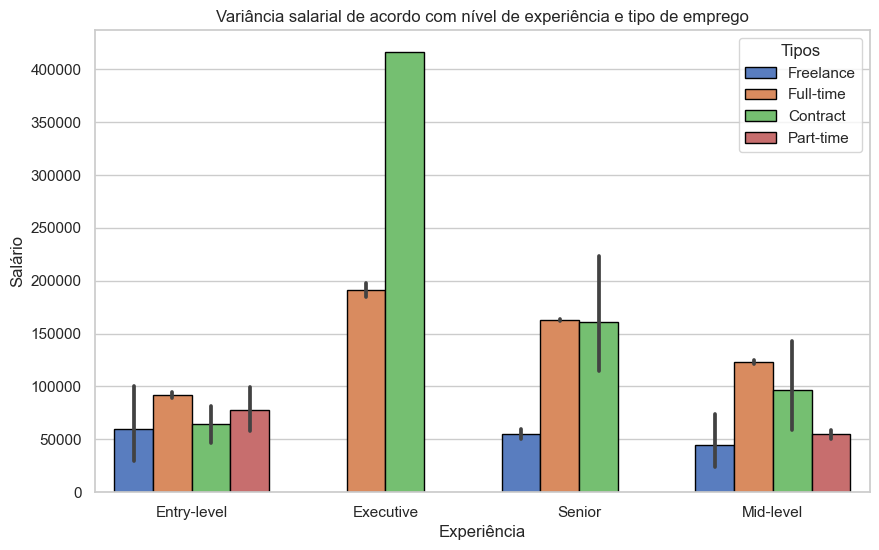

In [4]:
sns.set(style = 'whitegrid')

plt.figure(figsize=(10,6))
sns.barplot(data = df, x= 'experience_level', y = 'salary', hue = 'employment_type', palette = 'muted', edgecolor = 'black')
plt.xlabel('Experiência')
plt.ylabel('Salário')
plt.title('Variância salarial de acordo com nível de experiência e tipo de emprego')
plt.legend(title='Tipos', bbox_to_anchor=(1, 1))

#### 2) Existe alguma relação entre o tamanho da empresa e o tipo de trabalho?

In [5]:
size_rel = df.groupby('employment_type')['company_size'].value_counts().to_frame()

size_rel

count
employment_type company_size       
Contract        M                10
                S                 9
                L                 7
Freelance       M                 6
                S                 5
                L                 1
Full-time       M             13084
                L               906
                S               149
Part-time       M                12
                L                 5
                S                 5

##### Os insights retirados dos resultados mostram que:

- Há uma distribuição desigual do tamanho da empresa entre os tipos de emprego, com diferentes tipos de emprego sendo mais comuns em diferentes tamanhos de empresa.
- Existem preferências claras de tamanho de empresa para diferentes tipos de emprego, indicando uma variedade de oportunidades de emprego em empresas de diferentes tamanhos.
- Apesar da predominância de empregos em empresas de grande porte em tempo integral, ainda há uma presença significativa de empresas de pequeno e médio porte, sugerindo diversidade de oportunidades mesmo dentro de empregos em tempo integral.

#### 3) Qual os 3 países com maior distribuição de salário em USD ? E qual sua forma de trabalho mais comum ?

In [6]:
## Isolando a USDtype em uma variável

df_usd = df[df['salary_currency'] == 'USD']

df_set = df_usd['company_location'].value_counts().head(3)
df_set

company_location
United States     12443
Canada              319
United Kingdom      114
Name: count, dtype: int64

In [7]:
## Isolando os países com maiores distribuição salariais em USD

usd = ['United States','Canada', 'United Kingdom']

df_topusd = df_usd[df_usd['company_location'].isin(usd)]


## Verificando sua forma de trabalho mais comum no DF

df_topusd['work_setting'].value_counts().head(1)

work_setting
In-person    8705
Name: count, dtype: int64

#### 4) Crie uma visualização do nível de experiência, categoria de trabalho e salário em USD dos participantes no dataframe.

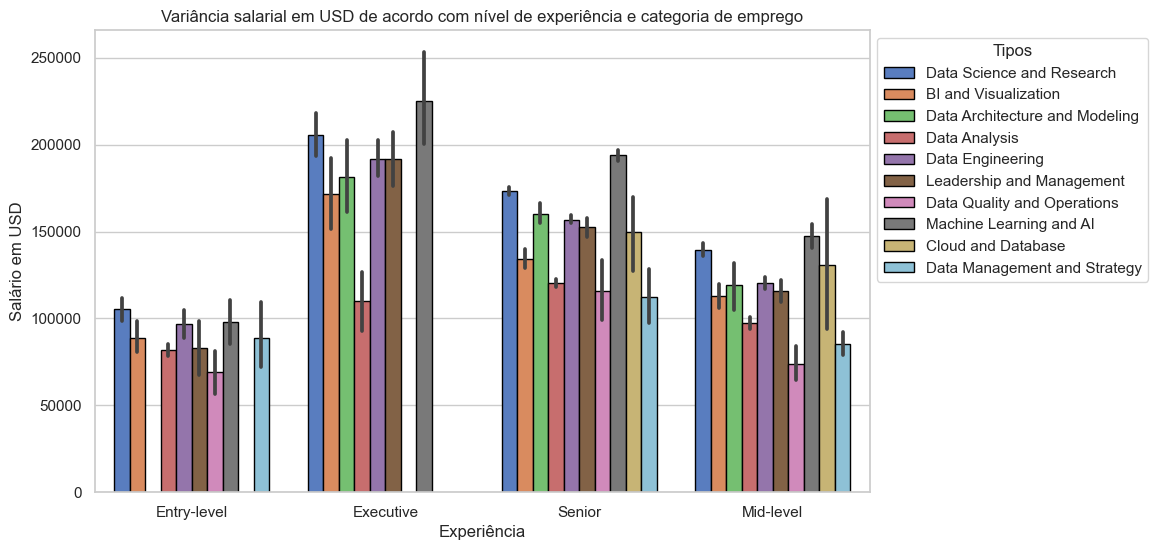

In [8]:
sns.set(style = 'whitegrid')

plt.figure(figsize=(10,6))
sns.barplot(data = df, x= 'experience_level', y = 'salary_in_usd', hue = 'job_category', palette = 'muted', edgecolor = 'black')
plt.xlabel('Experiência')
plt.ylabel('Salário em USD')
plt.title('Variância salarial em USD de acordo com nível de experiência e categoria de emprego')

plt.legend(title='Tipos', bbox_to_anchor=(1, 1))

#### 5) Quais países pagam em GBP ? Faça uma relação de tamanho e localização de companhias que trabalham com essa moeda.

In [10]:
## Isolando a moeda GBP em uma variável

df_gbp = df[df['salary_currency'] == 'GBP']

# Verificando os países mais comuns que trabalham com essa moeda e o tamanho de suas companhias.
df_gbp_country = df_gbp.groupby('company_location')['company_size'].value_counts().to_frame()
df_gbp_country.sort_values(by ='count', ascending = False)

count
company_location         company_size       
United Kingdom           M               473
                         L                22
United States            M                14
South Africa             M                12
United Kingdom           S                 8
Australia                M                 2
Canada                   M                 2
Central African Republic M                 2
Croatia                  M                 2
Gibraltar                L                 1

#### 6) Relacione o título do trabalho com seus respectivos salários, pegue o top 5 títulos com maiores salários, qual porte e localidade de empresa esses trabalham ?

In [11]:
rel_top5_salary = df.groupby('job_title')['salary'].value_counts().reset_index().sort_values(by='salary', ascending = False).head(5)
rel_top5_salary

,job_title,salary,count
5184,Research Scientist,450000,1
5060,Research Engineer,450000,1
4013,Head of Machine Learning,448000,1
4941,Research Engineer,440000,8
4088,ML Engineer,440000,1


In [12]:
list = ['Research Scientist','Research Engineer','Head of Machine Learning','Research Engineer','ML Engineer']

## Isolando esses dados em uma variavel

top_titles = df[df['job_title'].isin(list)]

## Descobrindo porte e localidade de suas empresas

top_titles.groupby(['company_size','company_location'])['job_title'].value_counts().to_frame()

count
company_size company_location   job_title                      
L            Australia          ML Engineer                   1
             Austria            Research Scientist            1
             Canada             Research Scientist            2
             China              Research Scientist            1
             Czechia            Research Scientist            1
             France             Research Scientist            1
             India              Research Scientist            1
             Netherlands        Research Scientist            2
             Portugal           Research Scientist            1
                                ML Engineer                   1
             Spain              Research Engineer             1
             United Kingdom     Research Scientist            2
             United States      Research Scientist           36
                                ML Engineer                   8
                                Research Engineer             2
M            Australia          ML Engineer                   2
                                Research Engineer             2
             Canada             Research Scientist            5
                                ML Engineer                   4
             France             Research Engineer             3
                                Research Scientist            1
             Germany            ML Engineer                   4
                                Research Engineer             2
             Portugal           Research Engineer             2
             Russian Federation Research Engineer             1
             South Africa       Research Engineer             6
             Spain              Research Scientist            4
             United Kingdom     Research Engineer             6
                                Research Scientist            2
             United States      Research Scientist          390
                                Research Engineer           236
                                ML Engineer                 127
                                Head of Machine Learning      6
S            France             Research Scientist            1
             Germany            Research Scientist            2
                                Research Engineer             2
                                ML Engineer                   1
             Türkiye            ML Engineer                   1
             United Kingdom     ML Engineer                   2
                                Research Engineer             1
             United States      ML Engineer                   3
                                Research Scientist            1

#### 7) Qual a média salarial de pessoas que trabalham com B.I no ano de 2023 ? 

In [15]:
## Isolando o ano de 2023 em uma variável

y2023 = df[df['work_year'] == 2023]

## Calculando a média salarial das pessoas que trabalham com B.I nesse ano

y2023_vis = y2023[y2023['job_category'] == 'BI and Visualization']
y2023_vis['salary'].mean()

132427.83018867925